In [1]:
import bamboolib as bam #easy to do data manipulation and highly recommended
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gensim #raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms.

In [2]:
# Import Data
y = pd.read_csv(r'/Users/lucyleng/Desktop/ALY 6040/NLP_Amazon/Reviews.csv')

In [3]:
y

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Rid Of Very Unhelpful Reviews & Narrow It To First 15000 Due To Data Size with score over 2 stars

In [4]:
train_set = y.loc[(y['Score'] > 2) & (y['Id'] < 15000)]

In [19]:
# Checking null variables
train_set.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Bring in packages to get rid of Stopwords. This helps get rid of junk words that aren't meaningful

In [5]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to /Users/lucyleng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lucyleng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Loop to strip out nouns

In [6]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Now use the loop to strip out nouns from the Text column

In [16]:
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))
data_nouns

,Text
0,Vitality food products quality product stew me...
2,confection centuries citrus gelatin nuts case ...
4,Great taffy price assortment yummy taffy Deliv...
5,hair taffy pound bag taffy flavors watermelon ...
6,saltwater taffy flavors candy None candies ver...
...,...
14994,product dishes rice mix daughter receipe recip...
14995,Rice Select Whole Wheat Orzo grocery store Ama...
14996,QFC grocery store place Amazon price package. ...
14997,Hard wheat orzo supermarket Amazon Tasty soup ...


<Figure size 432x288 with 0 Axes>

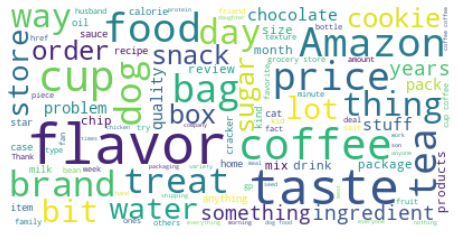

In [21]:
# observing high frequency words using wordcloud
from wordcloud import WordCloud, STOPWORDS
# Start with one review:
text = " ".join(review for review in data_nouns.Text)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br','better','looks','bought','several','product',
                 'appreciates','love','one','make','really','good','great','year'])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords, background_color="white").generate(text)

plt.figure()
plt.figure(figsize=[8,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Save wordcloud
wordcloud.to_file("Amazon_Review.png")

Add Stop Words to remove words that aren't useful to analysis but common

In [35]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = ENGLISH_STOP_WORDS.union(add_stop_words)


Turn Data Set Into A Matrix To Look Into Reviews (you will see in the last line we are only looking at the Text field)

In [36]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index


In [37]:
from gensim import matutils, models
import scipy.sparse
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())

Get ready to build model

In [38]:
# LDA model with two topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.045*"coffee" + 0.024*"flavor" + 0.019*"taste" + 0.015*"cup" + 0.012*"chocolate" + 0.010*"crackers" + 0.010*"product" + 0.009*"amazon" + 0.008*"sugar" + 0.008*"cups"'),
 (1,
  '0.019*"treats" + 0.019*"dog" + 0.018*"food" + 0.017*"product" + 0.015*"tea" + 0.013*"dogs" + 0.010*"treat" + 0.009*"amazon" + 0.008*"price" + 0.007*"mix"')]

In [42]:
# LDA model with three topics
#import time
#start = time.process_time()

ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

#print(time.process_time() - start)

[(0,
  '0.031*"treats" + 0.030*"dog" + 0.020*"dogs" + 0.019*"food" + 0.016*"treat" + 0.013*"cookies" + 0.012*"bag" + 0.011*"product" + 0.008*"newman" + 0.008*"ingredients"'),
 (1,
  '0.018*"product" + 0.013*"chocolate" + 0.013*"taste" + 0.012*"crackers" + 0.010*"flavor" + 0.009*"amazon" + 0.009*"price" + 0.009*"box" + 0.008*"milk" + 0.008*"food"'),
 (2,
  '0.078*"coffee" + 0.029*"tea" + 0.027*"cup" + 0.023*"flavor" + 0.017*"taste" + 0.014*"cups" + 0.010*"amazon" + 0.009*"product" + 0.008*"keurig" + 0.008*"roast"')]

In [40]:
# LDA model with four topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.019*"crackers" + 0.014*"taste" + 0.013*"flavor" + 0.013*"mix" + 0.011*"product" + 0.010*"chips" + 0.009*"amazon" + 0.009*"butter" + 0.008*"bag" + 0.008*"oil"'),
 (1,
  '0.022*"chocolate" + 0.017*"cookies" + 0.015*"taste" + 0.015*"sugar" + 0.014*"product" + 0.014*"flavor" + 0.013*"milk" + 0.012*"water" + 0.009*"baby" + 0.009*"cookie"'),
 (2,
  '0.097*"coffee" + 0.036*"tea" + 0.034*"cup" + 0.022*"flavor" + 0.018*"cups" + 0.016*"taste" + 0.010*"amazon" + 0.010*"keurig" + 0.010*"roast" + 0.008*"product"'),
 (3,
  '0.037*"treats" + 0.036*"dog" + 0.030*"food" + 0.024*"dogs" + 0.018*"product" + 0.018*"treat" + 0.012*"amazon" + 0.010*"price" + 0.010*"newman" + 0.009*"bag"')]